
# Project: Investigate a Dataset TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>I have decided to investigate the movie dataset to see the correlations that have taken place over the years. The data collected from Kaggle has provided us with about 10,000 movies to investigate including the revenue and user rating.  According to the website the "_adj" columns for budget and revenue are in 2010 dollars accounting for inflation over time.  I felt like this would give us a more accurate data frame overtime.  According to the National Association of Theatre Owners the average cost of a movie ticket in 1958 was 0.68 cents just to help give us some frame of reference as to why I chose the adjusted revenue and budget.



### Questions

> Does the popularity of the movie correlate with the release year, vote average, or the adjusted revenue?

> What kinds of properties are associated with movies that have high revenues?



<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, I will load in the data, check for cleanliness, and then trim and clean the dataset for analysis. 

### General Properties

In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#load dataset and read top rows

df=pd.read_csv('tmdb_movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# look at data shape
df.shape

(10866, 21)

In [4]:
# look at all the column names
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
# look at the general information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
# Show description of the data
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning (Dropping, Duplicates, Null Values, Replacing Zeros, Spliting, DateTime)

> **Next** Now that I have assesed the data I'm going to clean the data for future visualizations.

In [8]:
# First I'm going to drop any columns I have decided I do not need to answer my questions.

df.drop(['imdb_id','homepage','keywords','overview','tagline'], axis=1, inplace=True)

# Check that the columns were dropped

df.head()


,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
#check for duplicates

sum(df.duplicated())

1

In [11]:
#drop duplicates

df.drop_duplicates(inplace=True)

#check for duplicates

sum(df.duplicated())


0

In [12]:
#look for null values

df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [60]:
# Drop null values
## Because the dataset is so large I felt dropping the null values would not affect the outcome as much.

df.dropna(inplace=True)

In [14]:
#Check null values

df.isnull().sum().any()

False

In [26]:
#show revenue,budget, and runtime values that I will be working 

df[['budget','revenue','runtime','budget_adj','revenue_adj']].describe()

,budget,revenue,runtime,budget_adj,revenue_adj
count,9.772000e+03,9.772000e+03,9772.000000,9.772000e+03,9.772000e+03
mean,1.617967e+07,4.423121e+07,102.926627,1.941599e+07,5.705309e+07
std,3.221074e+07,1.225889e+08,27.877432,3.566634e+07,1.514499e+08
min,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,90.000000,0.000000e+00,0.000000e+00
50%,2.000000e+05,0.000000e+00,100.000000,3.061342e+05,0.000000e+00
75%,1.928750e+07,3.104729e+07,112.000000,2.464268e+07,4.311848e+07
max,4.250000e+08,2.781506e+09,877.000000,4.250000e+08,2.827124e+09


In [27]:
# Because that data has Zeros I'm going to replace with null values

df['budget'].replace(0, np.nan, inplace=True)
df['revenue'].replace(0, np.nan, inplace=True)
df['runtime'].replace(0, np.nan, inplace=True)
df['budget_adj'].replace(0, np.nan, inplace=True)
df['revenue_adj'].replace(0, np.nan, inplace=True)

In [28]:
# check zeros were filled

df[['budget','revenue','runtime','budget_adj','revenue_adj']].describe()

,budget,revenue,runtime,budget_adj,revenue_adj
count,5.021000e+03,4.750000e+03,9759.000000,5.021000e+03,4.750000e+03
mean,3.148929e+07,9.099524e+07,103.063736,3.778790e+07,1.173732e+08
std,3.920818e+07,1.632905e+08,27.641529,4.220942e+07,2.002779e+08
min,1.000000e+00,2.000000e+00,3.000000,9.210911e-01,2.370705e+00
25%,6.300000e+06,8.501551e+06,91.000000,8.890145e+06,1.163858e+07
50%,1.800000e+07,3.331677e+07,100.000000,2.374361e+07,4.584735e+07
75%,4.000000e+07,1.015876e+08,112.000000,5.082002e+07,1.349884e+08
max,4.250000e+08,2.781506e+09,877.000000,4.250000e+08,2.827124e+09


In [34]:
#the release date column needs to be fixed to a date time format

df['release_date']=pd.to_datetime(df['release_date'])

# Check the issue was fixed 

df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


In [31]:
# the genres column is stacked with multiple genres and I'm going to split the pipe and use the dominate genre

df['genres']= df['genres'].str.split('|', n=1, expand=True)

In [33]:
# Check the change
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (Does the popularity of the movie correlate with the release year, vote average, or the adjusted revenue?)

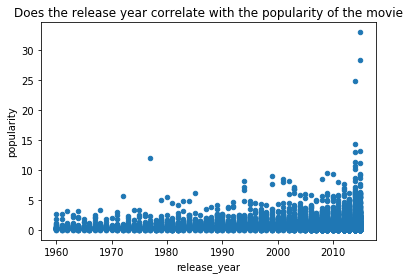

In [39]:
# I'm going to use a scatterplot to explore the correlation between the popularity of the movie and the release year.

df.plot(x='release_year', y='popularity',title='Does the release year correlate with the popularity of the movie',kind='scatter');


There does seems to be an upward trend.

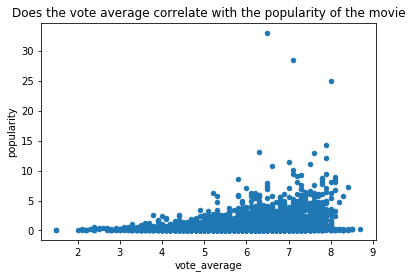

In [36]:
# I'm going to use a scatterplot to explore the correlation between the popularity of the movie and the vote average.

df.plot(x='vote_average', y='popularity',title='Does the vote average correlate with the popularity of the movie',kind='scatter');

This shows a slight positive correlation.

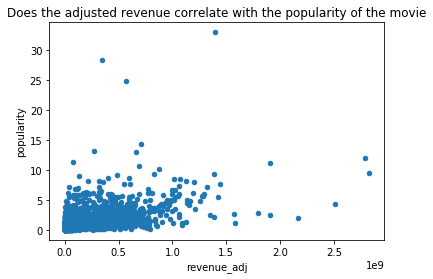

In [38]:
# I'm going to use a scatterplot to explore the correlation between the popularity of the movie and the adjusted revenue.

df.plot(x='revenue_adj', y='popularity',title='Does the adjusted revenue correlate with the popularity of the movie',kind='scatter');

There seems to be no correlation with the adjusted revenue and the popularity of the movie.

## Findings for Question 1

> After looking at the scatter plots there does seems to be some correlations.  For example, the release year does seem to show a very slight upward trend, but the popularity of a movies does not seem to drastically change with the year it was released.  I would not be able to say there is a definitive trend with the release year.  The vote average shows a positive correlation with popularity. And the adjusted revenue doesn’t show a correlation with popularity.  Some lower revenue movies are just as popular as higher revenue movies.   

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

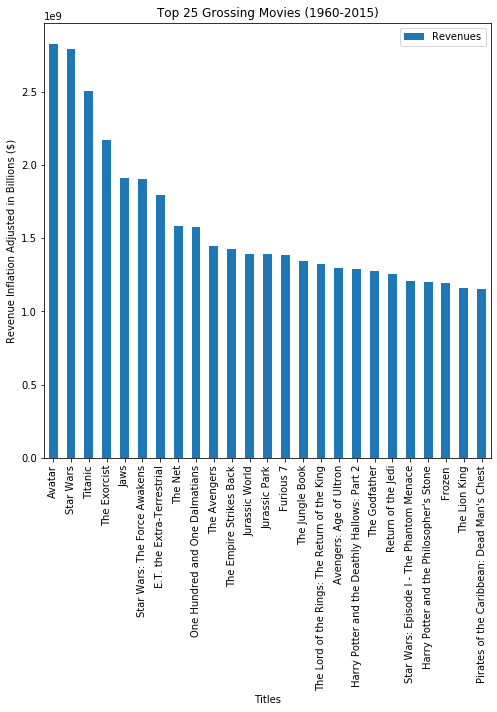

In [40]:
# look at top 25 adjusted revenue movies from 1960-2015

sorted_revenue=df['revenue_adj'].sort_values(ascending=False)[:25]

top_grossers=pd.DataFrame()
original_title=[]
revenues=[]
for i in sorted_revenue.index:
    original_title.append(df.loc[i,'original_title'])
    revenues.append(sorted_revenue.loc[i])
top_grossers['Titles']=original_title
top_grossers['Revenues']=revenues
top_grossers.set_index('Titles',inplace=True)
top_grossers.plot(kind='bar',figsize=(8,8))
plt.title('Top 25 Grossing Movies (1960-2015)')
plt.ylabel('Revenue Inflation Adjusted in Billions ($)');


In [59]:
#create different revenue levels of adjusted revenue to fall into
##create my bins
bin_edges=[2.370705e+00,2.396522e+06,2.118509e+07,7.485106e+07,2.827124e+09]
bin_names=['low','medium','mod_high','high']

# add revenue level to dataframe
df['revenue_level']=pd.cut(df['revenue_adj'],bin_edges,labels=bin_names)

#check
df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,revenue_level
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,high
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,high


In [58]:
#Lets look at the top ten production companies in each revenue level

for i in df['revenue_level'].unique():
    df_1=df[df['revenue_level']==i]
    print(i)
    print(df_1['production_companies'].value_counts().sort_values(ascending=False)[:10])

high
Paramount Pictures                              60
Universal Pictures                              31
Warner Bros.                                    19
Columbia Pictures                               19
Twentieth Century Fox Film Corporation          19
Walt Disney Pictures                            14
DreamWorks Animation                            14
Walt Disney Pictures|Pixar Animation Studios    13
Touchstone Pictures                             12
United Artists                                  11
Name: production_companies, dtype: int64
mod_high
Paramount Pictures                        35
Universal Pictures                        32
Columbia Pictures                         26
Warner Bros.                              23
New Line Cinema                           21
Walt Disney Pictures                      14
Touchstone Pictures                       13
20th Century Fox                          12
Twentieth Century Fox Film Corporation    11
Metro-Goldwyn-Mayer (MGM)     

This list shows us how many movies each production company has that falls in each revenue level. As we can see Paramount Pictures has produced the most high revenue movies at 60.

In [57]:
#lets look at the top ten directors in each revenue level and how many movies they produced.

for i in df['revenue_level'].unique():
    df_1=df[df['revenue_level']==i]
    print(i)
    print(df_1['director'].value_counts().sort_values(ascending=False)[:10])

high
Steven Spielberg    26
Clint Eastwood      18
Ron Howard          15
Tim Burton          14
Robert Zemeckis     13
Ridley Scott        13
Tony Scott          11
Martin Scorsese     11
Michael Bay         11
Joel Schumacher     11
Name: director, dtype: int64
mod_high
Woody Allen       10
John Carpenter     9
Clint Eastwood     8
Tyler Perry        7
Wes Craven         7
Renny Harlin       6
Kevin Smith        6
Ridley Scott       6
Brian De Palma     6
David Lynch        5
Name: director, dtype: int64
medium
Richard Linklater    6
Walter Hill          6
David Cronenberg     4
James Foley          4
Steven Soderbergh    4
Mike Leigh           4
Sam Peckinpah        4
Stephen Frears       4
Michael Mann         4
Spike Lee            4
Name: director, dtype: int64
nan
Series([], Name: director, dtype: int64)
low
Gregg Araki           4
Mike Cahill           3
Gus Van Sant          3
Dario Argento         3
Alex Gibney           3
Brad Anderson         3
Lars von Trier        3
Paul 




We can see in this list that the highest revenue director is Steven Spielberg with 26 movies.

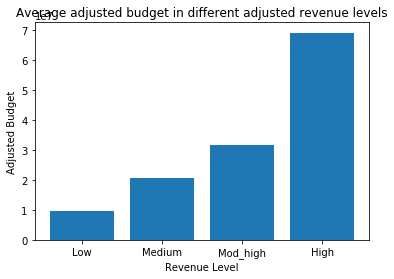

In [47]:
#lets look at the average adjusted budget across the different revenue levels

plt.bar(np.arange(4),df['budget_adj'].groupby(df['revenue_level']).mean())
label=['Low', 'Medium','Mod_high','High']
plt.xticks(np.arange(4),label)
plt.title('Average adjusted budget in different adjusted revenue levels')
plt.xlabel('Revenue Level')
plt.ylabel('Adjusted Budget');

This shows that movies with a higher budget also have a higher return of revenue.

In [49]:

print('The average budget of movies having a high revenue level is {}.'.format(round(df[df['revenue_level']=='high']['budget_adj'].mean(),2)))

print('The average of revenue of movies in the high revenue level is {}.'.format(round(df[df['revenue_level']=='high']['revenue_adj'].mean(),2)))

The average budget of movies having a high revenue level is 69105249.91.
The average of revenue of movies in the high revenue level is 266515107.28.


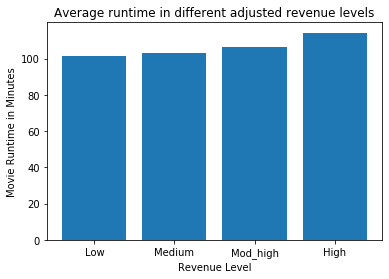

In [48]:
#lets look at the runtime assoicated with the adjusted revenue.


plt.bar(np.arange(4),df['runtime'].groupby(df['revenue_level']).mean())
label=['Low', 'Medium','Mod_high','High']
plt.xticks(np.arange(4),label)
plt.title('Average runtime in different adjusted revenue levels')
plt.xlabel('Revenue Level')
plt.ylabel('Movie Runtime in Minutes');

This chart shows that higher revenue movies have slightly longer runtimes.

In [50]:
print('The average runtime of movies in the high revenue level is {}.'.format(round(df[df['revenue_level']=='high']['runtime'].mean(),2)))

The average runtime of movies in the high revenue level is 114.19.


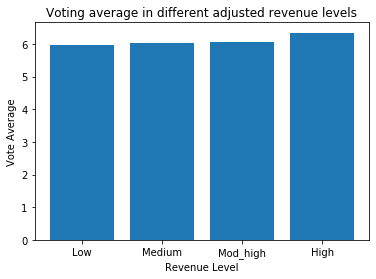

In [51]:
#lets see the vote average associated with adjusted revenue.

plt.bar(np.arange(4),df['vote_average'].groupby(df['revenue_level']).mean())
label=['Low', 'Medium','Mod_high','High']
plt.xticks(np.arange(4),label)
plt.title('Voting average in different adjusted revenue levels')
plt.xlabel('Revenue Level')
plt.ylabel('Vote Average');

This also shows that higher revenue movies have a higher vote average, not by much though.

In [52]:
print('The voting average of movies in the high revenue level is {}.'.format(round(df[df['revenue_level']=='high']['vote_average'].mean(),2)))

The voting average of movies in the high revenue level is 6.35.


In [56]:
#lets look at the highest revenued genres

for i in df['revenue_level'].unique():
    df_1=df[df['revenue_level']==i]
    print(i)
    print(df_1['genres'].value_counts().sort_values(ascending=False)[:10])

high
Action             372
Comedy             363
Drama              320
Adventure          221
Horror              96
Animation           78
Crime               77
Fantasy             71
Thriller            62
Science Fiction     61
Name: genres, dtype: int64
mod_high
Comedy       327
Drama        301
Action       234
Horror       111
Adventure     73
Thriller      56
Crime         52
Fantasy       35
Mystery       20
Romance       19
Name: genres, dtype: int64
medium
Drama          291
Comedy         223
Action         152
Horror          61
Crime           47
Thriller        42
Adventure       40
Documentary     23
Animation       22
Fantasy         16
Name: genres, dtype: int64
nan
Series([], Name: genres, dtype: int64)
low
Drama          213
Comedy         114
Action          60
Horror          53
Thriller        39
Documentary     32
Crime           29
Adventure       14
Romance         13
Fantasy         12
Name: genres, dtype: int64


We can see that the highest adjusted revenue movie genre is Action at 372 movies.

<a id='conclusions'></a>
## Conclusions and Answering question 2

> **Question 2**: There are a lot of properties that are associated with making a high revenue movie. As we can see from the visualizations it would best to start with Paramount Pictures, a top production company that so far has made the highest revenue movies at 60. Then picking a director that also has produced high revenue movies like Steven Spielberg at 26 successful movies. The more budget the movie has also correlates with a higher revenue movie and having the movie length also seems important as most movies in the high revenue category are about 114 minutes. And to top it all off to make a successfully high revenue movies make it Action. And those are all the properties that would make a high revenue movie based off the data.


>

> **Limitations**:There were some limitations with the data. The vote count and vote average category I am curious about the ages of those interviewed (young vs. old) and if that had any effect on the vote average/popularity. The genre category was missing a bit of data and we dropped those null values. In the cleaning process to help with explorations but I'm concerned the dropped null values could have skewed the results. 


### References

>https://www.natoonline.org/data/ticket-price/

>https://www.kaggle.com/tmdb/tmdb-movie-metadata

In [62]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0